## Introducción

Comenzamos importando las librerías requeridas para abrir los archivos:

In [405]:
import numpy as np
import pandas as pd

In [406]:
import os

print('### Marketing Funnel by Olist ###')
for idx, file in enumerate(os.listdir('C:/Users/dalan/Documents/Job_Applications/Transfiriendo/Inputs/Marketing_Funnel')):
    print(idx, '-', file)
print('\n-----------------------------------\n')

print('### Brazilian E-Commerce Public Dataset by Olist ###')
for idx, file in enumerate(os.listdir('C:/Users/dalan/Documents/Job_Applications/Transfiriendo/Inputs/Brazilian_E-Commerce')):
    print(idx, '-', file)
print('\n-----------------------------------\n')

### Marketing Funnel by Olist ###
0 - olist_closed_deals_dataset.csv
1 - olist_marketing_qualified_leads_dataset.csv

-----------------------------------

### Brazilian E-Commerce Public Dataset by Olist ###
0 - olist_customers_dataset.csv
1 - olist_geolocation_dataset.csv
2 - olist_orders_dataset.csv
3 - olist_order_items_dataset.csv
4 - olist_order_payments_dataset.csv
5 - olist_order_reviews_dataset.csv
6 - olist_products_dataset.csv
7 - olist_sellers_dataset.csv
8 - product_category_name_translation.csv

-----------------------------------



Tenemos dos tipos de datos, aquellos pertenecientes al embudo de mercado de Olist y la base de datos de comercio electrónico en Brasil por Olist. Nuestro primer objetivo será la identificación de las características principlaes de cada una de las bases que se encuentran allí:

### Caracterísitcas de cada Tabla. 

A partir de cada tabla daremos las características importantes de cada una para entender mejor la información presentada en cada una de ellas.

#### Marketing Funnel.

In [407]:
# leads dataset
mql = pd.read_csv('C:/Users/dalan/Documents/Job_Applications/Transfiriendo/Inputs/Marketing_Funnel/olist_marketing_qualified_leads_dataset.csv')
mql.head(3)

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search


In [408]:
mql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


Éste DataFrame nos da la información de potenciales clientes, y ofrece dos características importantes: La fecha de primer contacto y el origen de este contacto. 

In [409]:
Deals = pd.read_csv('C:/Users/dalan/Documents/Job_Applications/Transfiriendo/Inputs/Marketing_Funnel/olist_closed_deals_dataset.csv')
Deals.head(3)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0


In [410]:
Deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

El DataFrame llamado Delas nos da información de ventas realizadas a potenciales clientes (Marketing Leads). A pesar de tener varias caracterísitcas, descartamos las llamadas 'has_company', 'has_gtin', 'average_stock' y 'declared_product_catalog_size', puesto que sus valores diferentes al valor nulo apenas representa cerca del $8\%$ del total de datos. 

#### Brazilian E-Commerce Public Dataset.

In [411]:
customer = pd.read_csv('C:/Users/dalan/Documents/Job_Applications/Transfiriendo/Inputs/Brazilian_E-Commerce/olist_customers_dataset.csv')
customer.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [412]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [413]:
geolocation = pd.read_csv('C:/Users/dalan/Documents/Job_Applications/Transfiriendo/Inputs/Brazilian_E-Commerce/olist_geolocation_dataset.csv')
geolocation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [414]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Podemos utilizar la totalidad de los datos de los anteriores DataFrame para relacionar la información de los datos de geolocalización con la posición de los diferentes clientes. 

In [415]:
order_items = pd.read_csv('C:/Users/dalan/Documents/Job_Applications/Transfiriendo/Inputs/Brazilian_E-Commerce/olist_order_items_dataset.csv')
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [416]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Nuevamente, la información de order_items la podemos utilizar en su totalidad ya que relaciona los valores de venta de las órdenes y su precio de transporte.

In [417]:
order_payments = pd.read_csv('C:/Users/dalan/Documents/Job_Applications/Transfiriendo/Inputs/Brazilian_E-Commerce/olist_order_payments_dataset.csv')
order_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [418]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Adicionalmente, podemos relacionar el DataFrame anterior (el de las órdenes), con el presente, que muestra los detalles de los pagos realizados por los clientes de las órdenes.

In [419]:
reviews = pd.read_csv('C:/Users/dalan/Documents/Job_Applications/Transfiriendo/Inputs/Brazilian_E-Commerce/olist_order_reviews_dataset.csv')
reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [420]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Nuevamente, éste DataFrame relaciona los comentarios de los clientes acerca de los productos utilizando el identificador de las órdenes, también notamos que apenas el $40\%$ de los clientes expresaalgún mensaje como comentario.

In [421]:
orders_time = pd.read_csv('C:/Users/dalan/Documents/Job_Applications/Transfiriendo/Inputs/Brazilian_E-Commerce/olist_orders_dataset.csv')
orders_time.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [422]:
orders_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Éste DataFrame se especializa en registrar los diferentes tiempos de las órdenes de los clientes.

In [423]:
products = pd.read_csv('C:/Users/dalan/Documents/Job_Applications/Transfiriendo/Inputs/Brazilian_E-Commerce/olist_products_dataset.csv')
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [424]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Éste DataFrame nos ofrece información detallada de los productos manejados por Olist.

In [425]:
sellers = pd.read_csv('C:/Users/dalan/Documents/Job_Applications/Transfiriendo/Inputs/Brazilian_E-Commerce/olist_sellers_dataset.csv')
sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [426]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Éste DataFrame nos ofrece información a cerca de la ubicación de los vendedores a lo largo de Brasil.

In [427]:
product_category = pd.read_csv('C:/Users/dalan/Documents/Job_Applications/Transfiriendo/Inputs/Brazilian_E-Commerce/product_category_name_translation.csv')
product_category.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [428]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Éste DataFrame es una traducción al inglés de las diferentes categorías de los productos del portugués.

## Análisis Exploratorio de datos.

Existen tres DataFrames en los que podemos realizar un análisis exploratorio de datos numéricos en algunas de sus características importantes:

### Order_payments

In [25]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Para realizar la descripción, aislamos los valores numéricos del DataFrame y encontramos sus valores de tendencia central y el principal de dispersión. 

In [26]:
order_payments_description = order_payments[['payment_sequential', 'payment_installments', 'payment_value']]

In [27]:
order_payments_description.head()

,payment_sequential,payment_installments,payment_value
0,1,8,99.33
1,1,1,24.39
2,1,1,65.71
3,1,8,107.78
4,1,2,128.45


In [28]:
order_payments_description.mean()

payment_sequential        1.092679
payment_installments      2.853349
payment_value           154.100380
dtype: float64

In [29]:
order_payments_description.std()

payment_sequential        0.706584
payment_installments      2.687051
payment_value           217.494064
dtype: float64

Estos valores nos indican que el principal rango de los pagos sequenciales está en el intervalo $[0.39, 1.79]$. Adicionalmente, que las cuotas de pago oscilan en el intervalo $[0.17, 5.53]$ y tambiém que los valores de pago alacnazan valores cercanos a $\$ 371.59$ con una media de $\$ 154.10$. Podemos hacer una gráfica de las cuotas y de los valores de pago para vislumbrar sus valores máximos:

In [30]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi'] = 300

Text(0, 0.5, 'Payment Installments')

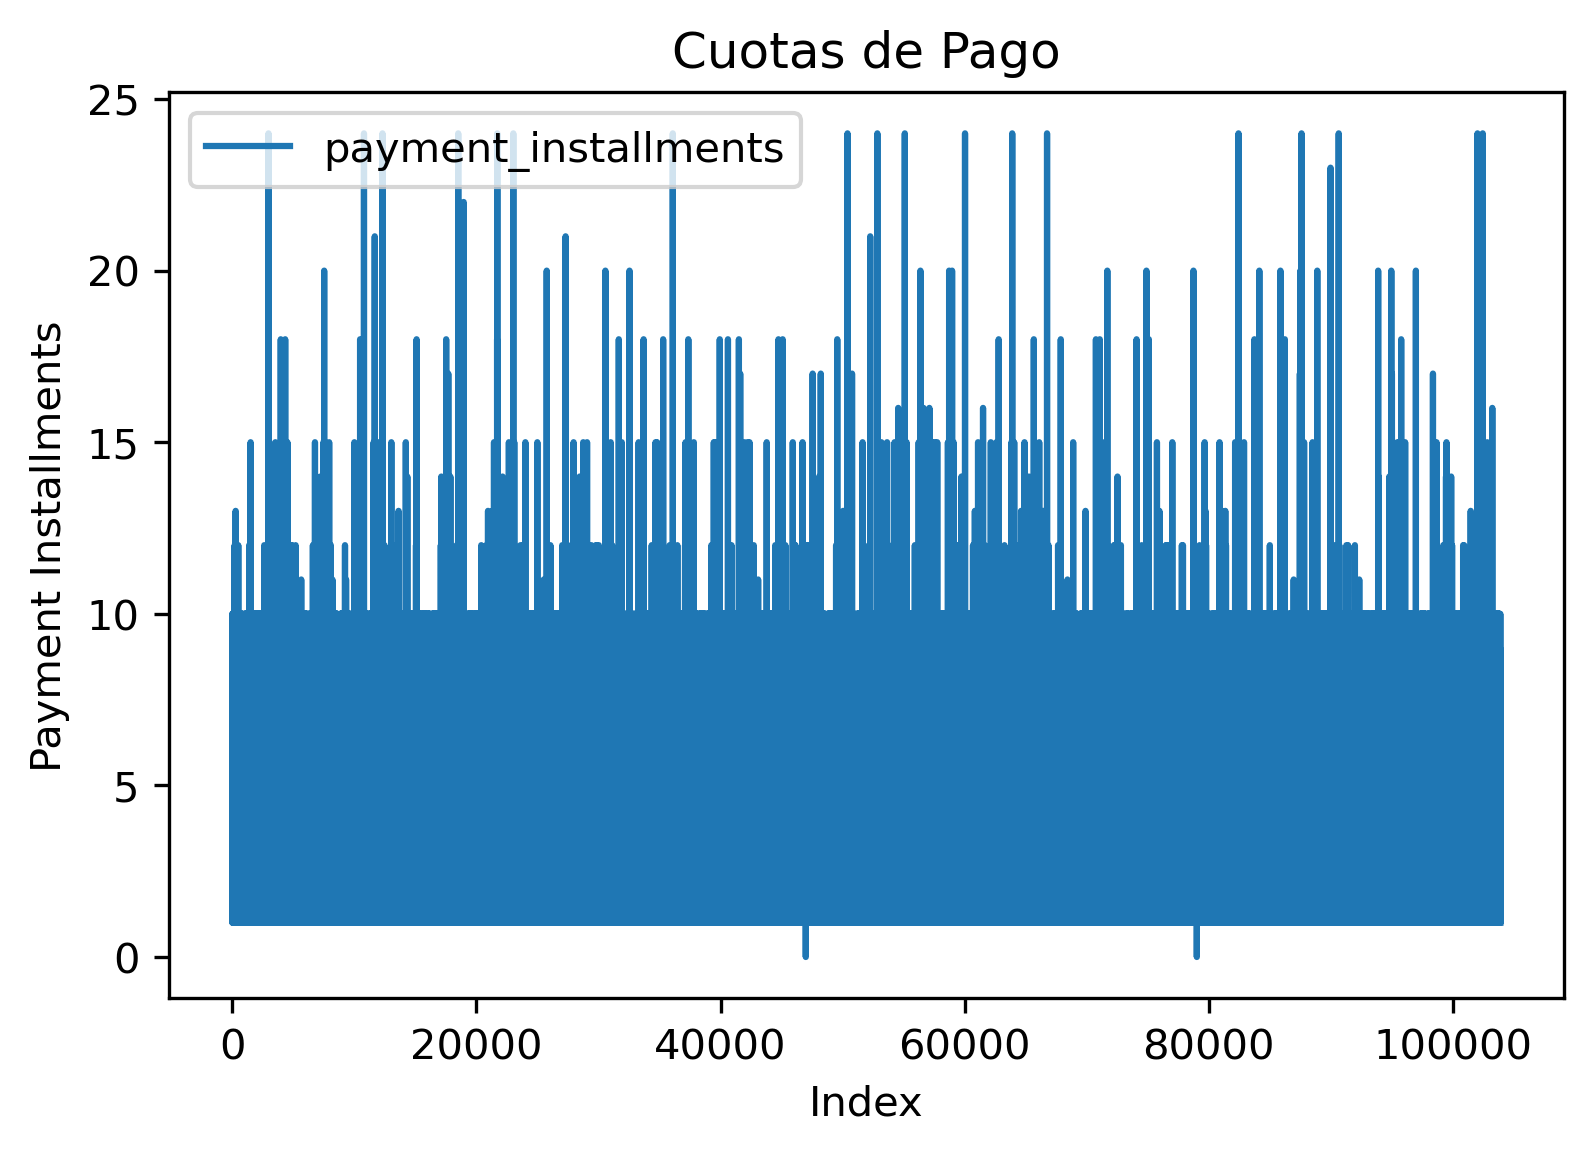

In [31]:
ax = order_payments_description['payment_installments'].plot(style = ['-'])
ax.legend(['payment_installments'])
ax.set_title('Cuotas de Pago')
ax.set_xlabel('Index')
ax.set_ylabel('Payment Installments')

A partir de ésta gráfica podemos ver que el máximo de cuotas de pago llega a las $25$.

Text(0, 0.5, 'Payment values')

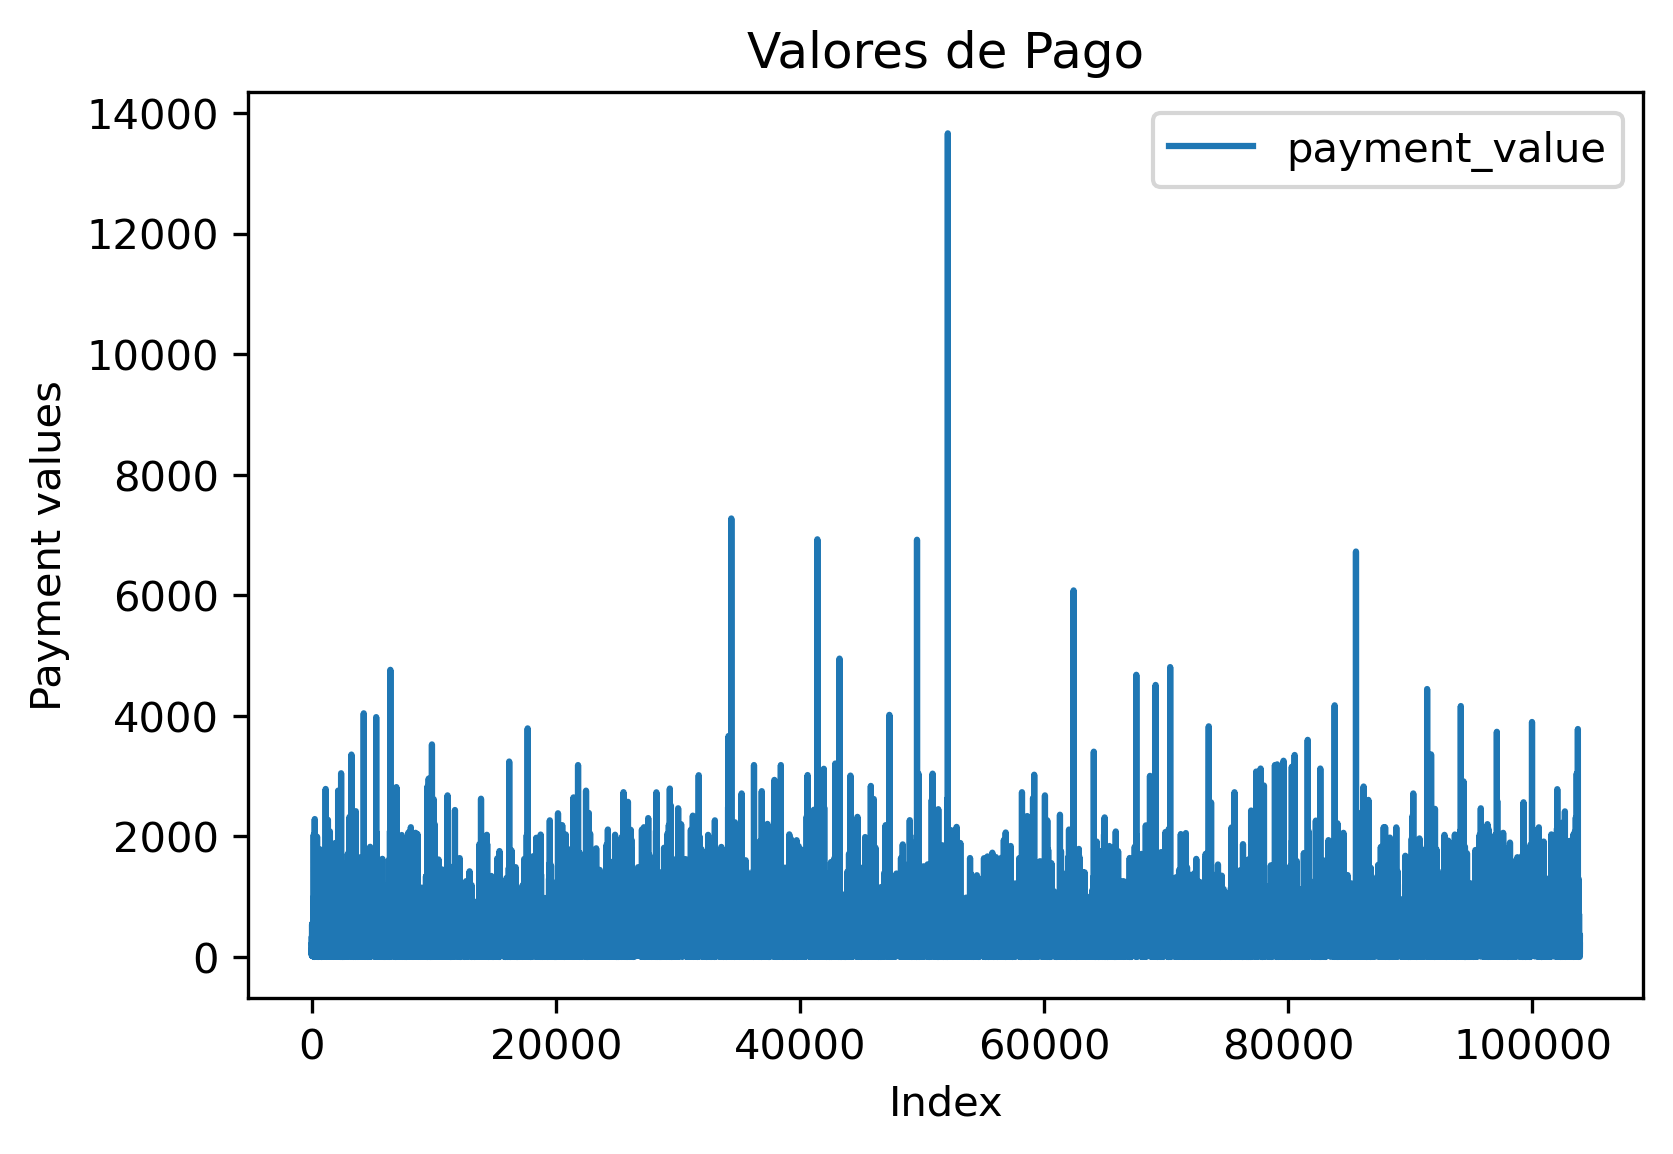

In [32]:
ax = order_payments_description['payment_value'].plot(style = ['-'])
ax.legend(['payment_value'])
ax.set_title('Valores de Pago')
ax.set_xlabel('Index')
ax.set_ylabel('Payment values')

El máximo valor pagado alcanza los $\$ 14000$, el cual parece ser un valor anómalo dado de el segundo valor de pago es de aproximadamente $\$ 8000$.

### Order_Items

In [33]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


En el caso del DataFrame Order_Items, tenemos que podemos hacer el mismo análisis para las caracetrísticas 'price' y 'freight_value':

In [34]:
order_items_description = order_items[['price', 'freight_value']]

In [35]:
order_items_description.mean()

price            120.653739
freight_value     19.990320
dtype: float64

In [36]:
order_items_description.std()

price            183.633928
freight_value     15.806405
dtype: float64

De aquí podemos concluir que la mayoría de precios de los productos están por debajo de $\$ 304.28$ mientras que la mayoría de valores de transporte llegan hasta los $\$35.79$.

Nuevamente podemos graficar los valores de estas cantidades:

Text(0, 0.5, 'price')

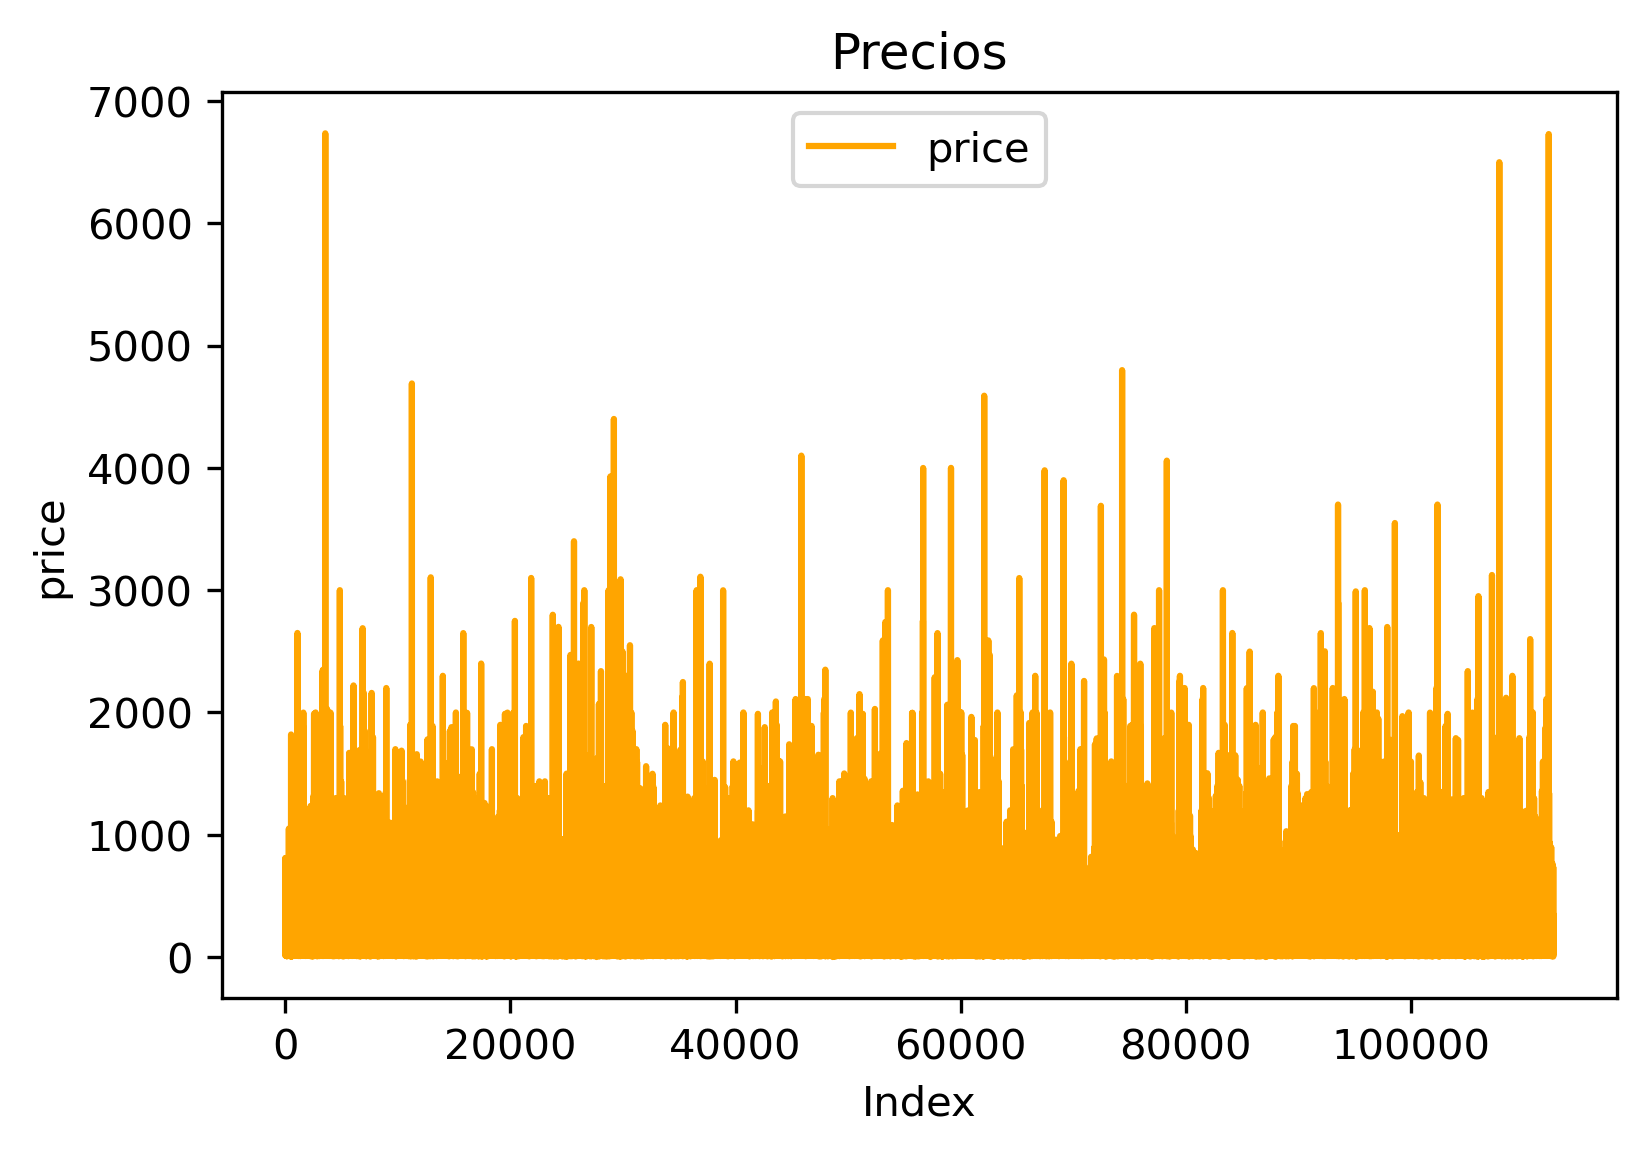

In [37]:
ax = order_items_description['price'].plot(style = ['-'], color = 'orange')
ax.legend(['price'])
ax.set_title('Precios')
ax.set_xlabel('Index')
ax.set_ylabel('price')

En general, todos los precios permanecen por debajo de los $\$70 000$.

Text(0, 0.5, 'freight_value')

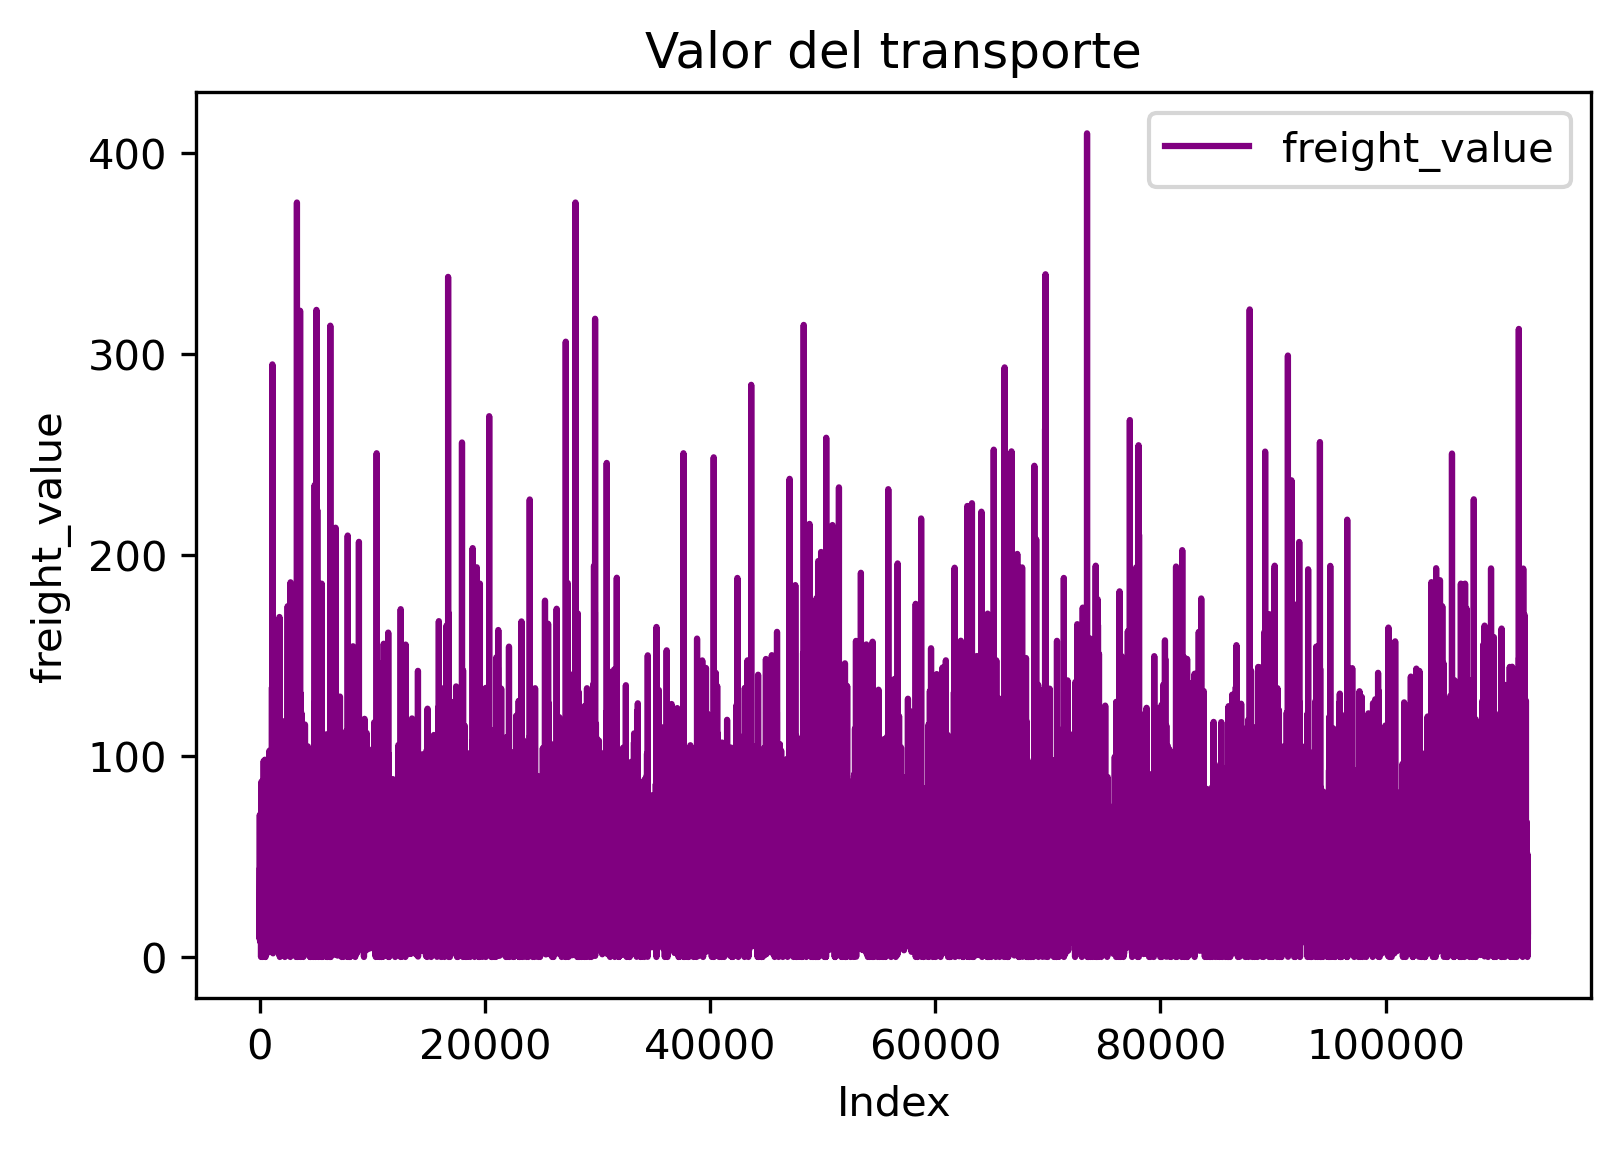

In [38]:
ax = order_items_description['freight_value'].plot(style = ['-'], color = 'purple')
ax.legend(['freight_value'])
ax.set_title('Valor del transporte')
ax.set_xlabel('Index')
ax.set_ylabel('freight_value')

Mientras que esta gráfica muestra que el valor de transporte para los cerca de $100000$ productos no excede los $\$400$.

### Products

In [39]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Separamos todas las cantidades que posean valores numéricos en sus características:

In [40]:
products_description = products[['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                                 'product_length_cm', 'product_height_cm', 'product_width_cm']]

In [41]:
products_description.mean()

product_name_lenght             48.476949
product_description_lenght     771.495285
product_photos_qty               2.188986
product_weight_g              2276.472488
product_length_cm               30.815078
product_height_cm               16.937661
product_width_cm                23.196728
dtype: float64

In [42]:
products_description.std()

product_name_lenght             10.245741
product_description_lenght     635.115225
product_photos_qty               1.736766
product_weight_g              4282.038731
product_length_cm               16.914458
product_height_cm               13.637554
product_width_cm                12.079047
dtype: float64

In [43]:
products_description.mean() + products_description.std()

product_name_lenght             58.722689
product_description_lenght    1406.610509
product_photos_qty               3.925752
product_weight_g              6558.511219
product_length_cm               47.729536
product_height_cm               30.575215
product_width_cm                35.275776
dtype: float64

Al sumar ambos índices podemos ver el orden de valores en los cuales se encuentran aproximadamente el $66\%$ de los valores de cada una de las caracterísitcas de este DataFrame.

## Interpretación del Problema.

Los diferentes DataFrames nos ofrecen información relacionada con dos grandes características del comercio de Olist: las órdenes y los productos. Cada uno de ellos tiene ciertas características específicas que se pueden extraer de los DataFrames y que se pueden relacionar con los *id* de otras características en los diferentes DataFrame, a partir de las relaciones de la figura **Data Scheme**.

**Caracterísitcas asociadas a las órdenes:**

 - Potenciales clientes.
 - Clientes con quienes se cerraron tratos.
 - geolocalización de los clientes.
 - vendedores.
 - geolocalización de los vendedores.
 - precios y valores del transporte.
 - pagos.
 
**Características asociadas a los productos:**
 
 - Categorización de los productos.
 - Revisiones de los clientes a los productos.
 - Tiempos de entrega.
 - Dimensiones y caracterísitcas físicas de los productos.

A partir de aquí proponemos nos objetivos a alcanzar: el primero será la de predecir de la forma más precisa posible los valores futuros de las características de las ventas de Olist y asimismo la identificación de alguna clasificación para la optimización de los tiempos de envío, y los sectores poblacionales que potencialmente pueden aumentar el público objetivo de la compañía.

## Series Temporales.

Existen DataFrames desde los cuales podemos realizar estudios de series temporales. En especial, puesto que tenemos los valores de los tiempos de creación de revisión de productos así como los tiempos de respuesta de la revisión y también los puntajes de las revisiones, podemos ver cómo estos han evolucionado en el tiempo.

In [44]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [45]:
review_times = reviews[['review_score', 'review_creation_date', 'review_answer_timestamp']]

In [46]:
review_times.head()

,review_score,review_creation_date,review_answer_timestamp
0,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,5,2018-03-01 00:00:00,2018-03-02 10:26:53


Ahora podemos cambiar el índice a la fecha de creación de la revisión:

In [47]:
review_times['review_creation_date'] = pd.to_datetime(review_times['review_creation_date'], format = '%Y-%m-%d')

C:\Users\dalan\anacondaF\envs\Libraries\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
review_times['review_answer_timestamp'] = pd.to_datetime(review_times['review_answer_timestamp'], format = '%Y-%m-%d')

C:\Users\dalan\anacondaF\envs\Libraries\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
review_times.head()

,review_score,review_creation_date,review_answer_timestamp
0,4,2018-01-18,2018-01-18 21:46:59
1,5,2018-03-10,2018-03-11 03:05:13
2,5,2018-02-17,2018-02-18 14:36:24
3,5,2017-04-21,2017-04-21 22:02:06
4,5,2018-03-01,2018-03-02 10:26:53


Gracias a esto, podemos definir una característica a la que denominaremos tiempo de respuesta, como la resta entre el tiempo de respuesta y la fecha de creación:

In [50]:
review_times['answering_time'] = review_times['review_answer_timestamp'] - review_times['review_creation_date']

C:\Users\dalan\anacondaF\envs\Libraries\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
review_times.head()

,review_score,review_creation_date,review_answer_timestamp,answering_time
0,4,2018-01-18,2018-01-18 21:46:59,0 days 21:46:59
1,5,2018-03-10,2018-03-11 03:05:13,1 days 03:05:13
2,5,2018-02-17,2018-02-18 14:36:24,1 days 14:36:24
3,5,2017-04-21,2017-04-21 22:02:06,0 days 22:02:06
4,5,2018-03-01,2018-03-02 10:26:53,1 days 10:26:53


Now we can plot the evolution of the 'review_score' in the time:

In [52]:
review_times = review_times.set_index('review_creation_date')

In [53]:
review_times = review_times.sort_index()
review_times.head()

,review_score,review_answer_timestamp,answering_time
review_creation_date,,,
2016-10-02,1,2016-10-26 12:31:00,24 days 12:31:00
2016-10-06,1,2016-10-07 18:32:28,1 days 18:32:28
2016-10-09,1,2016-10-11 14:31:29,2 days 14:31:29
2016-10-15,4,2016-10-16 03:20:17,1 days 03:20:17
2016-10-15,4,2016-10-17 21:02:49,2 days 21:02:49


In [54]:
review_times['answering_time_seconds'] = review_times['answering_time'].apply(lambda x: x.seconds)

In [55]:
review_times.head()

,review_score,review_answer_timestamp,answering_time,answering_time_seconds
review_creation_date,,,,
2016-10-02,1,2016-10-26 12:31:00,24 days 12:31:00,45060
2016-10-06,1,2016-10-07 18:32:28,1 days 18:32:28,66748
2016-10-09,1,2016-10-11 14:31:29,2 days 14:31:29,52289
2016-10-15,4,2016-10-16 03:20:17,1 days 03:20:17,12017
2016-10-15,4,2016-10-17 21:02:49,2 days 21:02:49,75769


We can make a plot of the review score obtained as function of the answering_time_seconds

In [56]:
print('Puntaje' + '\t' + 'Tiempo de respuesta (promedio)' + '\t' + 'Tiempo de respuesta (Desviación)')
for j in range(1, 6):
    print(str(j) + 
          ' \t '+
          str(review_times[review_times['review_score'] == j]['answering_time_seconds'].mean())+
          '\t' +
          '\t' +
          str(review_times[review_times['review_score'] == j]['answering_time_seconds'].std())
         )

Puntaje	Tiempo de respuesta (promedio)	Tiempo de respuesta (Desviación)
1 	 47494.4773148929		23424.294413904383
2 	 48432.0714064915		24947.810480607004
3 	 48740.74767708459		25684.332263865104
4 	 49270.41645833333		25776.543642882894
5 	 49230.46443747823		26559.329518252584


A partir de estos datos de los puntajes obtenidos como función del tiempo de respuesta podemos ver que en promedio, los puntajes de los clientes tienen los mismos tiempos de respuesta con desviaciones muy semejantes, lo que nos puede indicar que en el momento de calificar la calidad del servicio de Olist, sus clientes no se fijan en el tiempo de respuesta en general.

Conla intención de determinar la satisfacción de los clientes con respecto a otras variables, podemos unir las tablas 'reviews' y 'orders_time'

In [57]:
times_reviews = reviews[['order_id', 'review_score']].merge(orders_time[['order_id',
                                                         'order_purchase_timestamp',
                                                         'order_approved_at',
                                                         'order_delivered_carrier_date',
                                                         'order_delivered_customer_date',
                                                         'order_estimated_delivery_date']],
                                           on = 'order_id',
                                           how = 'left')

In [58]:
times_reviews.head()

,order_id,review_score,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,73fc7af87114b39712e6da79b0a377eb,4,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00
1,a548910a1c6147796b98fdf73dbeba33,5,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00
2,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00
3,658677c97b385a9be170737859d3511b,5,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00


In [59]:
times_reviews['order_purchase_timestamp'] = pd.to_datetime(times_reviews['order_purchase_timestamp'], format = '%Y-%m-%d')
times_reviews['order_approved_at'] = pd.to_datetime(times_reviews['order_approved_at'], format = '%Y-%m-%d')
times_reviews['order_delivered_carrier_date'] = pd.to_datetime(times_reviews['order_delivered_carrier_date'], format = '%Y-%m-%d')
times_reviews['order_delivered_customer_date'] = pd.to_datetime(times_reviews['order_delivered_customer_date'], format = '%Y-%m-%d')
times_reviews['order_estimated_delivery_date'] = pd.to_datetime(times_reviews['order_estimated_delivery_date'], format = '%Y-%m-%d')

A partir de este DataFrame existe un indicador de satisfacción muy claro, que es la diferencia de tiempo entre que el cliente recibe la orden y el tiempo en la que lo ordena, de manera que podemos tomar la diferencia entre las columnas 'order_delivered_customer_date' y 'order_purchase_timestamp':

In [60]:
times_reviews['wait'] = times_reviews['order_delivered_customer_date'] - times_reviews['order_purchase_timestamp']

In [61]:
times_reviews.head()

,order_id,review_score,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,wait
0,73fc7af87114b39712e6da79b0a377eb,4,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,6 days 03:11:52
1,a548910a1c6147796b98fdf73dbeba33,5,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,9 days 10:52:01
2,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,13 days 07:32:26
3,658677c97b385a9be170737859d3511b,5,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,10 days 15:27:22
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,18 days 05:34:32


In [62]:
times_reviews['wait'] = times_reviews['wait'].apply(lambda x: x.seconds)

In [63]:
times_reviews.head()

,order_id,review_score,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,wait
0,73fc7af87114b39712e6da79b0a377eb,4,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,11512.0
1,a548910a1c6147796b98fdf73dbeba33,5,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,39121.0
2,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,27146.0
3,658677c97b385a9be170737859d3511b,5,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,55642.0
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,20072.0


In [64]:
print('Puntaje' + '\t' + 'Tiempo de respuesta (promedio)' + '\t' + 'Tiempo de respuesta (Desviación)')
for j in range(1, 6):
    print(str(j) + 
          ' \t '+
          str(times_reviews[times_reviews['review_score'] == j]['wait'].mean())+
          '\t' +
          '\t' +
          str(times_reviews[times_reviews['review_score'] == j]['wait'].std())
         )

Puntaje	Tiempo de respuesta (promedio)	Tiempo de respuesta (Desviación)
1 	 39968.0438659424		27266.64247910167
2 	 40188.09087893864		27542.854791242313
3 	 40378.899838649624		27663.2589655549
4 	 40099.49800420168		27629.532621326423
5 	 40139.34596808064		27605.553954716717


En general también podemos apreciar que este tiempo de espera para recibir el producto en general no influye en la puntuación del cliente.

## Predicción de ventas y modelos de regresión.

Los valores de pago de los clientes están registrados en el DataFrame 'order_payments'. Trataremos de obtener la mayor cantidad de valores numéricos con los cuales podamos predecir el comportamiento de este valor de pago utilizando la mayor cantidad de valores numéricos como características. 

In [65]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [66]:
order_payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

Vamos a unir este DataFrame con el de 'order_items' a través de la característica *order_id*:

In [67]:
sales_prediction = order_payments.merge(order_items, on = 'order_id', how = 'left')
sales_prediction.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1.0,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88


Ahora este DataFrame vamos a unirlo con el llamado 'products' a través de la caratcerística *product_id*

In [68]:
sales_prediction = sales_prediction.merge(products, on = 'product_id', how = 'left')
sales_prediction.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1.0,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88,cama_mesa_banho,54.0,120.0,1.0,835.0,40.0,9.0,33.0


In [69]:
sales_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118431 entries, 0 to 118430
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    118431 non-null  object 
 1   payment_sequential          118431 non-null  int64  
 2   payment_type                118431 non-null  object 
 3   payment_installments        118431 non-null  int64  
 4   payment_value               118431 non-null  float64
 5   order_item_id               117601 non-null  float64
 6   product_id                  117601 non-null  object 
 7   seller_id                   117601 non-null  object 
 8   shipping_limit_date         117601 non-null  object 
 9   price                       117601 non-null  float64
 10  freight_value               117601 non-null  float64
 11  product_category_name       115903 non-null  object 
 12  product_name_lenght         115903 non-null  float64
 13  product_descri

A partir de este DataFrame, separaremos todoas las características que nos serán útiles para hacer un análisis de regresión y trataremos de realizar un estudio no-supervisado de los datos resultantes:

In [70]:
sales_prediction = sales_prediction[['payment_value', 'price', 'freight_value', 'product_name_lenght',
                                    'product_description_lenght', 'product_weight_g', 'product_length_cm',
                                    'product_height_cm', 'product_width_cm']]

In [71]:
sales_prediction.head()

,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,99.33,79.80,19.53,57.0,921.0,800.0,17.0,27.0,17.0
1,24.39,17.00,7.39,59.0,1274.0,150.0,16.0,6.0,11.0
2,65.71,56.99,8.72,54.0,1536.0,250.0,20.0,8.0,21.0
3,107.78,89.90,17.88,60.0,188.0,1200.0,44.0,2.0,35.0
4,128.45,113.57,14.88,54.0,120.0,835.0,40.0,9.0,33.0


In [72]:
sales_prediction = sales_prediction.dropna()

In [73]:
sales_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115902 entries, 0 to 118430
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   payment_value               115902 non-null  float64
 1   price                       115902 non-null  float64
 2   freight_value               115902 non-null  float64
 3   product_name_lenght         115902 non-null  float64
 4   product_description_lenght  115902 non-null  float64
 5   product_weight_g            115902 non-null  float64
 6   product_length_cm           115902 non-null  float64
 7   product_height_cm           115902 non-null  float64
 8   product_width_cm            115902 non-null  float64
dtypes: float64(9)
memory usage: 8.8 MB


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [75]:
X = sales_prediction[['price', 'freight_value', 'product_name_lenght',
                      'product_description_lenght', 'product_weight_g', 'product_length_cm',
                      'product_height_cm', 'product_width_cm']]

In [76]:
y = sales_prediction[['payment_value']]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86926 entries, 16777 to 16156
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       86926 non-null  float64
 1   freight_value               86926 non-null  float64
 2   product_name_lenght         86926 non-null  float64
 3   product_description_lenght  86926 non-null  float64
 4   product_weight_g            86926 non-null  float64
 5   product_length_cm           86926 non-null  float64
 6   product_height_cm           86926 non-null  float64
 7   product_width_cm            86926 non-null  float64
dtypes: float64(8)
memory usage: 6.0 MB


In [79]:
lr = LinearRegression().fit(X_train, y_train)

In [80]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.58
Test set score: 0.49


In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler1.fit(X_train)
X_train_scaled = scaler1.transform(X_train)
X_test_scaled = scaler1.transform(X_test)

In [82]:
scaler2 = MinMaxScaler()
scaler2.fit(y_train)
y_train_scaled = scaler2.transform(y_train)
y_test_scaled = scaler2.transform(y_test)

In [83]:
X_train_scaled.shape

(86926, 8)

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianDropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow.keras.optimizers as optimizers

C:\Users\dalan\anacondaF\envs\Libraries\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dalan\anacondaF\envs\Libraries\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dalan\anacondaF\envs\Libraries\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dalan\anacondaF\envs\Libraries\lib\site-packages\ten

In [85]:
Net = Sequential()
Net.add(Dense(8, input_shape = (8, ), activation = 'relu'))
Net.add(GaussianDropout(0.06))
Net.add(Dense(8, activation = 'relu'))
Net.add(GaussianDropout(0.06))
Net.add(Dense(4, activation = 'relu'))
Net.add(GaussianDropout(0.06))
Net.add(Dense(4, activation = 'relu'))
Net.add(GaussianDropout(0.06))
Net.add(Dense(2, activation = 'relu'))
Net.add(GaussianDropout(0.06))
Net.add(Dense(2, activation = 'relu'))
Net.add(GaussianDropout(0.06))
Net.add(Dense(1, activation = 'linear'))
Net.compile(loss = 'mean_squared_error', optimizer = 'adam' )

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [86]:
training_batches = 20000
batchsize = X_train_scaled[0]
costs = np.zeros(training_batches)

for j in range(training_batches):
    costs[j] = Net.train_on_batch(X_train_scaled, y_train_scaled)
    print(str(costs[j]), end = "   \r")

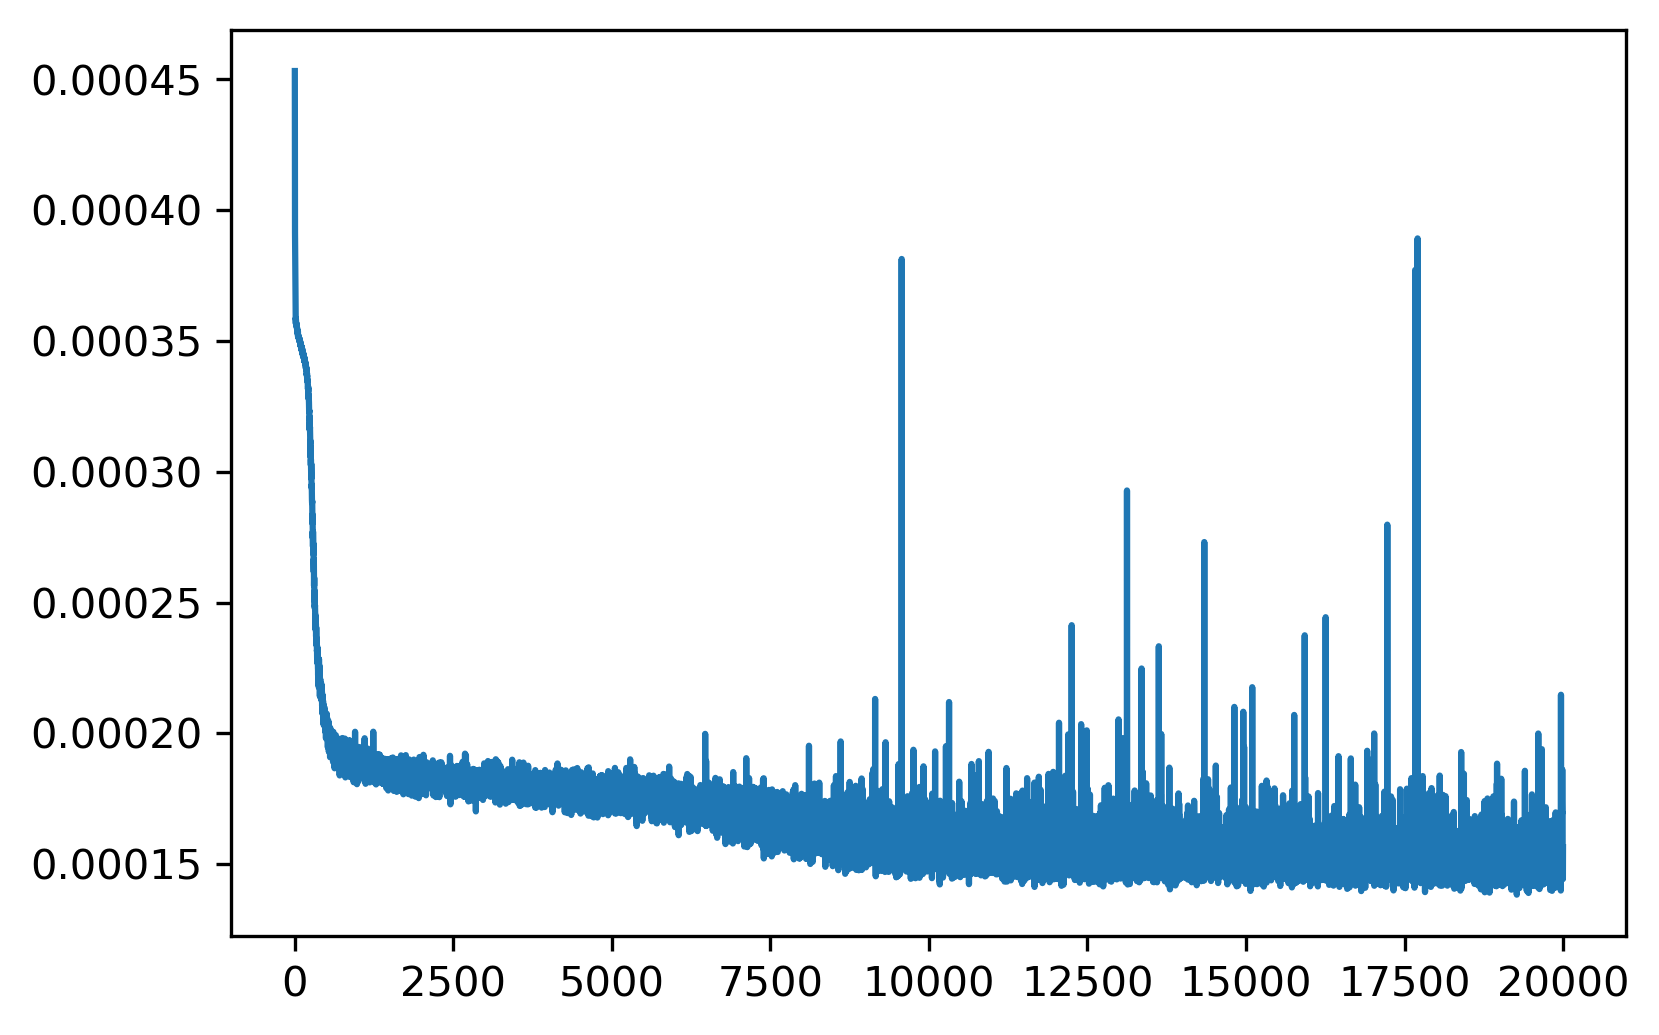

In [87]:
plt.plot(costs)

In [88]:
y_out = Net.predict_on_batch(X_test_scaled)

In [89]:
y_out

array([[0.00679282],
       [0.07332364],
       [0.0162575 ],
       ...,
       [0.01321643],
       [0.01615722],
       [0.00679282]], dtype=float32)

In [90]:
y_test_scaled

array([[0.00619507],
       [0.0761127 ],
       [0.01623161],
       ...,
       [0.02145772],
       [0.0028886 ],
       [0.01933537]])

In [91]:
mse = (np.square(y_out - y_test_scaled)).mean(axis = 0)

In [92]:
mse

array([0.00012932])

In [93]:
scaler2.inverse_transform(y_out)

array([[  92.81767],
       [1001.90015],
       [ 222.14383],
       ...,
       [ 180.59032],
       [ 220.77351],
       [  92.81767]], dtype=float32)

In [94]:
y_test

,payment_value
2272,84.65
50545,1040.01
111846,221.79
38570,155.10
104930,51.79
...,...
99846,156.92
111990,237.69
39662,293.20
57868,39.47


In [95]:
y_out = scaler2.inverse_transform(y_out)

In [96]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42)
cluster = tsne.fit_transform(X)

In [97]:
cluster

array([[  2.4981456,  23.74566  ],
       [ -7.6898613, -36.048172 ],
       [-33.16232  , -39.77002  ],
       ...,
       [-31.159395 ,  20.833353 ],
       [ 41.278065 ,  23.009901 ],
       [ 40.407608 , -16.989794 ]], dtype=float32)

In [98]:
import random
random_list = []
for i in range(0, 200):
    n = random.randint(1, cluster.shape[0])
    random_list.append(n)

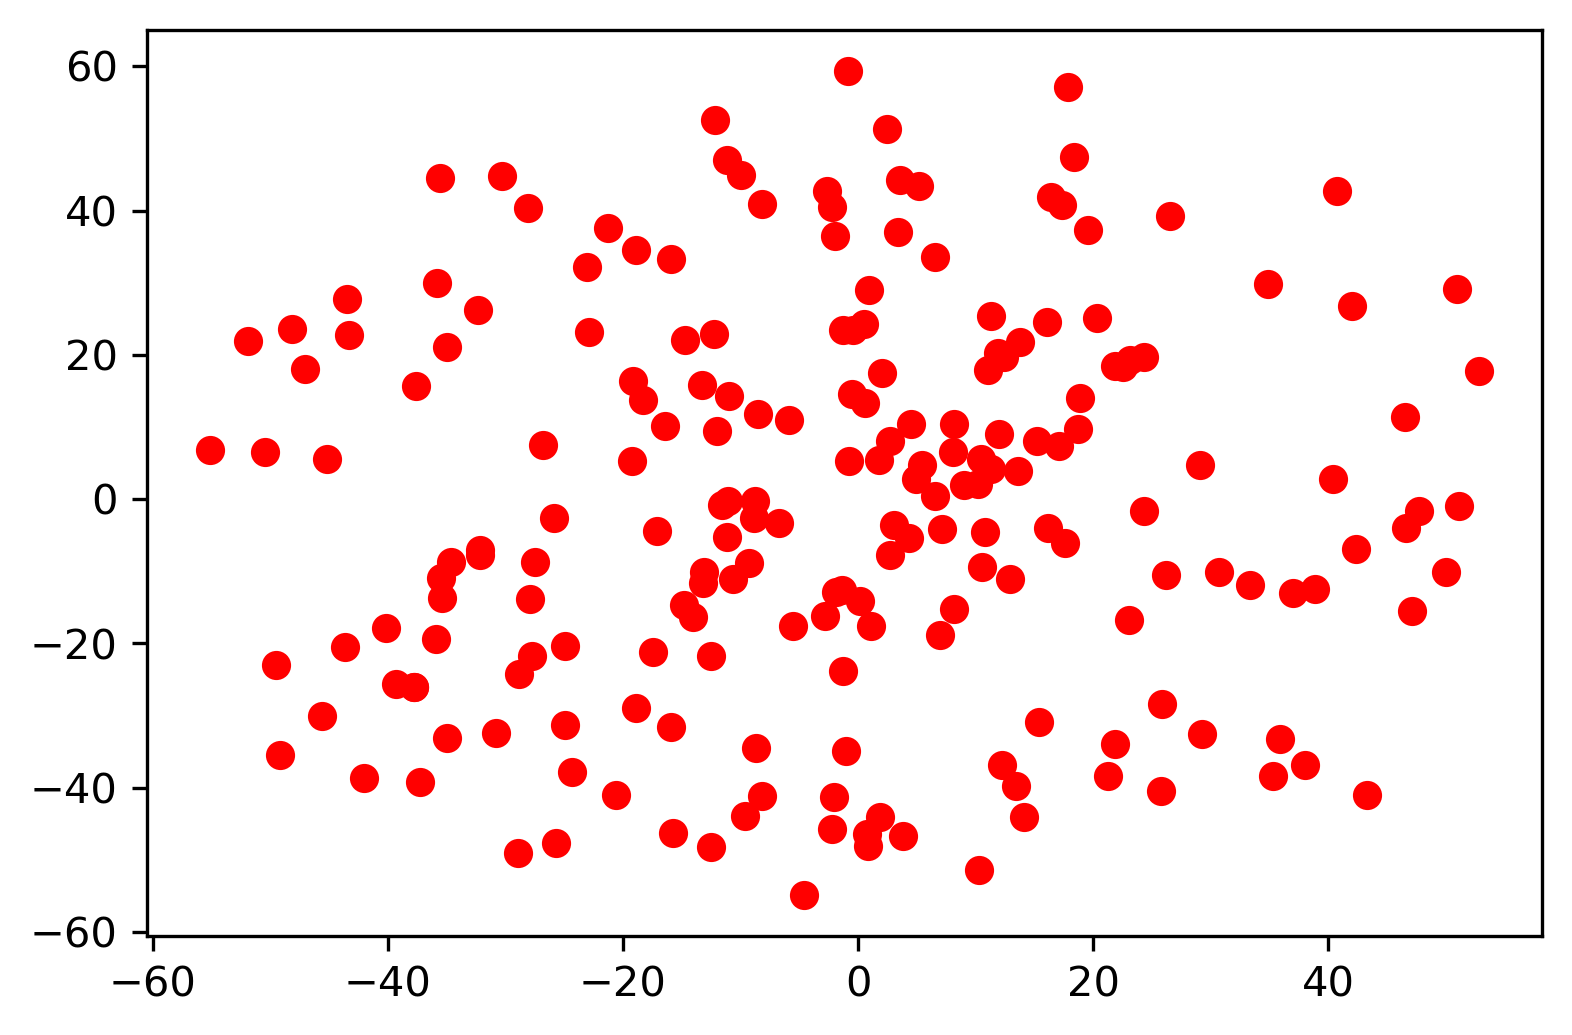

In [99]:
for j in random_list:
    plt.plot(cluster[j, 0], cluster[j, 1], 'ro')

In [100]:
cluster.shape

(115902, 2)

## Clasificación.

Podemos utilizar el puntaje de la revisión de cada cliente para dar una clasificación a los datos utilizados para la predicción de ventas:

In [101]:
class_prediction = order_payments.merge(order_items, on = 'order_id', how = 'left')
class_prediction = class_prediction.merge(products, on = 'product_id', how = 'left')
class_prediction = class_prediction.merge(reviews, on = 'order_id', how = 'left')
class_prediction = class_prediction.dropna()

In [102]:
X = class_prediction[['payment_value', 'price', 'freight_value', 'product_name_lenght',
                      'product_description_lenght', 'product_weight_g', 'product_length_cm',
                      'product_height_cm', 'product_width_cm']]

In [103]:
y = class_prediction[['review_score']]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [105]:
from sklearn.tree import DecisionTreeClassifier
dctc_model = DecisionTreeClassifier(max_depth = 10)

In [106]:
dctc_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [107]:
from sklearn.metrics import accuracy_score
Review_preds = dctc_model.predict(X_test)
print(accuracy_score(y_test, Review_preds))

0.5559973492379059


In [108]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 1000, random_state = 42)
forest.fit(X_train.to_numpy(), y_train.to_numpy())

C:\Users\dalan\anacondaF\envs\Libraries\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(n_estimators=1000, random_state=42)

In [109]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.965
Accuracy on test set: 0.608


## Optimización de Entregas de Pedidos.

In [110]:
deliv_opt = order_payments.merge(order_items, on = 'order_id', how = 'left')
deliv_opt = deliv_opt.merge(products, on = 'product_id', how = 'left')
deliv_opt = deliv_opt.merge(reviews, on = 'order_id', how = 'left')
deliv_opt = deliv_opt.merge(orders_time, on = 'order_id', how = 'left')

In [111]:
deliv_opt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119148 entries, 0 to 119147
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119148 non-null  object 
 1   payment_sequential             119148 non-null  int64  
 2   payment_type                   119148 non-null  object 
 3   payment_installments           119148 non-null  int64  
 4   payment_value                  119148 non-null  float64
 5   order_item_id                  118315 non-null  float64
 6   product_id                     118315 non-null  object 
 7   seller_id                      118315 non-null  object 
 8   shipping_limit_date            118315 non-null  object 
 9   price                          118315 non-null  float64
 10  freight_value                  118315 non-null  float64
 11  product_category_name          116606 non-null  object 
 12  product_name_lenght           

In [112]:
deliv_opt['order_purchase_timestamp'] = pd.to_datetime(deliv_opt['order_purchase_timestamp'], format = '%Y-%m-%d')
deliv_opt['order_approved_at'] = pd.to_datetime(deliv_opt['order_approved_at'], format = '%Y-%m-%d')
deliv_opt['order_delivered_carrier_date'] = pd.to_datetime(deliv_opt['order_delivered_carrier_date'], format = '%Y-%m-%d')
deliv_opt['order_delivered_customer_date'] = pd.to_datetime(deliv_opt['order_delivered_customer_date'], format = '%Y-%m-%d')
deliv_opt['order_estimated_delivery_date'] = pd.to_datetime(deliv_opt['order_estimated_delivery_date'], format = '%Y-%m-%d')

In [113]:
deliv_opt['deliv_time'] = deliv_opt['order_delivered_carrier_date'] - deliv_opt['order_delivered_customer_date']
deliv_opt['deliv_time'] = deliv_opt['deliv_time'].apply(lambda x: x.seconds)

In [114]:
deliv_opt = deliv_opt[['payment_value', 'price', 'freight_value', 'product_name_lenght',
                                    'product_description_lenght', 'product_weight_g', 'product_length_cm',
                                    'product_height_cm', 'product_width_cm', 'deliv_time']]
deliv_opt = deliv_opt.dropna()

In [115]:
X = deliv_opt[['payment_value', 'price', 'freight_value', 'product_name_lenght',
               'product_description_lenght', 'product_weight_g', 'product_length_cm',
               'product_height_cm', 'product_width_cm']]

In [116]:
y = deliv_opt[['deliv_time']]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [118]:
scaler1.fit(X_train)
X_train_scaled = scaler1.transform(X_train)
X_test_scaled = scaler1.transform(X_test)

scaler2.fit(y_train)
y_train_scaled = scaler2.transform(y_train)
y_test_scaled = scaler2.transform(y_test)

In [172]:
Net = Sequential()
Net.add(Dense(8, input_shape = (9, ), activation = 'sigmoid'))
Net.add(GaussianDropout(0.1))
Net.add(Dense(8, activation = 'sigmoid'))
Net.add(GaussianDropout(0.1))
Net.add(Dense(6, activation = 'sigmoid'))
Net.add(GaussianDropout(0.1))
Net.add(Dense(6, activation = 'sigmoid'))
Net.add(GaussianDropout(0.1))
Net.add(Dense(4, activation = 'sigmoid'))
Net.add(GaussianDropout(0.1))
Net.add(Dense(4, activation = 'sigmoid'))
Net.add(GaussianDropout(0.1))
Net.add(Dense(2, activation = 'sigmoid'))
Net.add(GaussianDropout(0.1))
Net.add(Dense(2, activation = 'sigmoid'))
Net.add(GaussianDropout(0.1))
Net.add(Dense(1, activation = 'sigmoid'))
Net.compile(loss = 'mean_squared_error', optimizer = 'adam' )

In [173]:
training_batches = 20000
batchsize = X_train_scaled[0]
costs = np.zeros(training_batches)

for j in range(training_batches):
    costs[j] = Net.train_on_batch(X_train_scaled, y_train_scaled)
    print(str(costs[j]), end = "   \r")

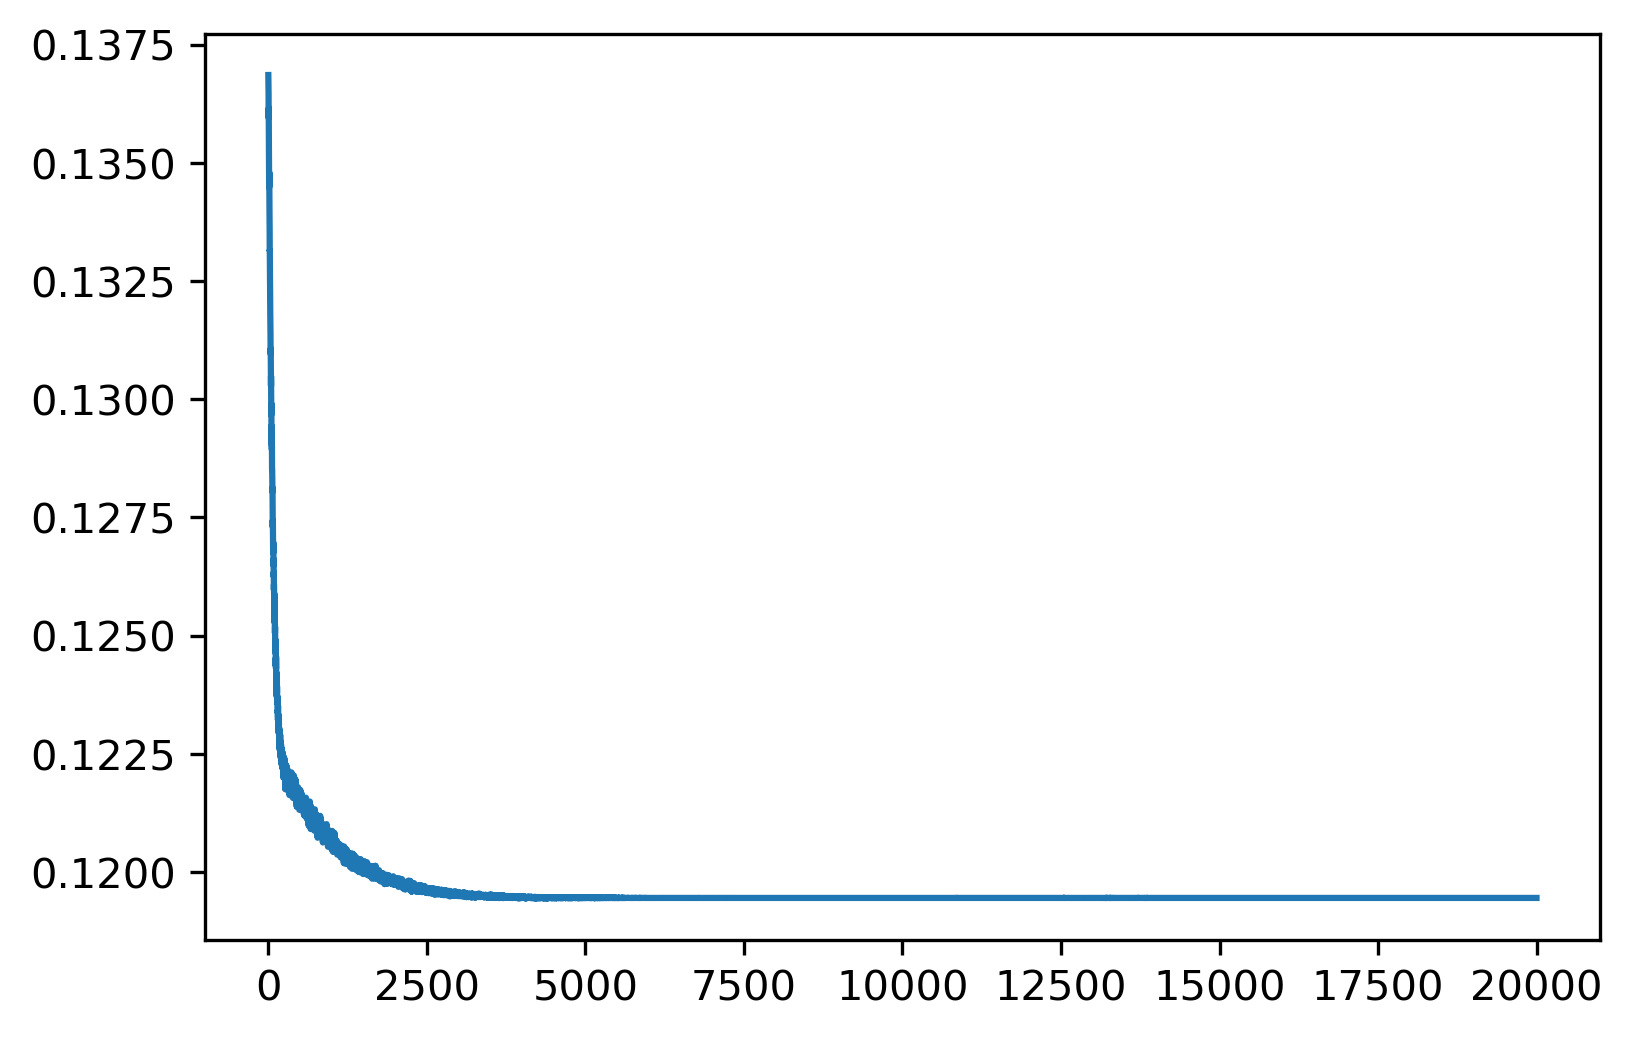

In [174]:
plt.plot(costs)

In [175]:
y_out = Net.predict_on_batch(X_test_scaled)

In [176]:
mse = (np.square(y_out - y_test_scaled)).mean(axis = 0)

In [177]:
mse

array([0.11965679])

In [178]:
scaler2.inverse_transform(y_out)

array([[47055.562],
       [47055.562],
       [47055.562],
       ...,
       [47055.562],
       [47055.57 ],
       [47055.57 ]], dtype=float32)

In [179]:
y_test

,deliv_time
104788,14142.0
1896,6382.0
9862,42844.0
85678,62058.0
2122,24214.0
...,...
113732,50522.0
92967,69881.0
25704,6337.0
61972,8999.0


## Sentiment Analysis using NLP

In [560]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [561]:
sentiment = reviews[['review_comment_message', 'review_score']]
sentiment = sentiment.dropna()

In [562]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41753 entries, 3 to 99999
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_message  41753 non-null  object
 1   review_score            41753 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 978.6+ KB


In [563]:
sentiment.head()

,review_comment_message,review_score
3,Recebi bem antes do prazo estipulado.,5
4,Parabéns lojas lannister adorei comprar pela I...,5
9,aparelho eficiente. no site a marca do aparelh...,4
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4
15,"Vendedor confiável, produto ok e entrega antes...",5


In [564]:
sentiment['sentiment'] = sentiment['review_score'].apply(lambda x: 'Mau' if x <= 3 else 'Ok')

In [565]:
sentiment.head(15)

,review_comment_message,review_score,sentiment
3,Recebi bem antes do prazo estipulado.,5,Ok
4,Parabéns lojas lannister adorei comprar pela I...,5,Ok
9,aparelho eficiente. no site a marca do aparelh...,4,Ok
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4,Ok
15,"Vendedor confiável, produto ok e entrega antes...",5,Ok
16,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",2,Mau
19,Péssimo,1,Mau
22,Loja nota 10,5,Ok
24,obrigado pela atençao amim dispensada,5,Ok
27,A compra foi realizada facilmente.\r\nA entreg...,5,Ok


In [566]:
import re

In [567]:
pip install --upgrade gensim

Note: you may need to restart the kernel to use updated packages.


In [568]:
import gensim

In [569]:
pip install --upgrade nltk

Note: you may need to restart the kernel to use updated packages.


In [570]:
import nltk

In [571]:
def depure_data(data):
    data = re.sub('\s+', ' ', data)
    data = re.sub("\'", "", data)
    return data

In [572]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),
                                            deacc = True))

In [573]:
def detokenize(text):
    return nltk.tokenize.treebank.TreebankWordDetokenizer().detokenize(text)

In [574]:
temp = []
data_to_list = reviews['review_comment_message'].dropna().values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
data_words = list(sent_to_words(temp))
data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:15])

['recebi bem antes do prazo estipulado', 'parabens lojas lannister adorei comprar pela internet seguro pratico parabens todos feliz pascoa', 'aparelho eficiente no site marca do aparelho esta impresso como desinfector ao chegar esta com outro nome atualizar com marca correta uma vez que mesmo aparelho', 'mas um pouco travando pelo valor ta boa', 'vendedor confiavel produto ok entrega antes do prazo', 'gostaria de saber que houve sempre recebi essa compra agora me decpcionou', 'pessimo', 'loja nota', 'obrigado pela atencao amim dispensada', 'compra foi realizada facilmente entrega foi efetuada muito antes do prazo dado produto ja comecou ser usado ate presente sem problemas', 'relogio muito bonito barato', 'nao gostei comprei gato por lebre', 'sempre compro pela internet entrega ocorre antes do prazo combinado que acredito ser prazo maximo no stark prazo maximo ja se esgotou ainda nao recebi produto', 'recebi exatamente que esperava as demais encomendas de outros vendedores atrasaram ma

In [575]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
reviews1 = pad_sequences(sequences, maxlen = max_len)
print(reviews1)

[[   0    0    0 ...    4    6  213]
 [   0    0    0 ...   65  113  377]
 [   0    0    0 ...    5   66  409]
 ...
 [   0    0    0 ...   17  159   31]
 [   0    0    0 ...  589   13  146]
 [   0    0    0 ...    2 3008 1839]]


In [576]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(layers.Embedding(max_words, 20))
model.add(layers.LSTM(15, dropout = 0.5))
model.add(layers.Dense(7, activation = 'softmax'))
model.add(layers.Dense(2, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

checkpoint1 = ModelCheckpoint("best_model.hdf5",
                             monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'auto',
                             period = 1, save_weights_only = False)

In [577]:
y.to_numpy()

array(['Ok', 'Ok', 'Ok', ..., 'Ok', 'Mau', 'Mau'], dtype=object)

In [578]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y.to_numpy())
onehot_encoder = OneHotEncoder(sparse = False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [579]:
onehot_encoded

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [581]:
X_train, X_test, y_train, y_test = train_test_split(X, onehot_encoded, random_state = 42)

In [583]:
history = model.fit(X_train, y_train, epochs = 5, validation_data = (X_test, y_test), callbacks = [checkpoint1])

Train on 31314 samples, validate on 10439 samples
Epoch 1/5
31314/31314 [==============================] - 69s 2ms/step - loss: 0.2906 - accuracy: 0.8961 - val_loss: 0.2812 - val_accuracy: 0.8964

Epoch 00001: val_accuracy improved from 0.88974 to 0.89635, saving model to best_model.hdf5
Epoch 2/5
31314/31314 [==============================] - 69s 2ms/step - loss: 0.2839 - accuracy: 0.8959 - val_loss: 0.2750 - val_accuracy: 0.8981

Epoch 00002: val_accuracy improved from 0.89635 to 0.89807, saving model to best_model.hdf5
Epoch 3/5
31314/31314 [==============================] - 67s 2ms/step - loss: 0.2748 - accuracy: 0.9011 - val_loss: 0.2701 - val_accuracy: 0.8994

Epoch 00003: val_accuracy improved from 0.89807 to 0.89942, saving model to best_model.hdf5
Epoch 4/5
31314/31314 [==============================] - 67s 2ms/step - loss: 0.2693 - accuracy: 0.9032 - val_loss: 0.2675 - val_accuracy: 0.9004

Epoch 00004: val_accuracy improved from 0.89942 to 0.90037, saving model to best_model

In [585]:
sentiments = ['Mau', 'Ok']

sequence = tokenizer.texts_to_sequences(['Meu pacote estava três dias atrasado!'])
test = pad_sequences(sequence, maxlen = max_len)
sentiments[np.around(model.predict(test),
                    decimals = 0).argmax(axis = 1)[0]]

'Mau'

In [586]:
sequence = tokenizer.texts_to_sequences(['Meu pedido chegou a tempo'])
test = pad_sequences(sequence, maxlen = max_len)
sentiments[np.around(model.predict(test),
                    decimals = 0).argmax(axis = 1)[0]]

'Ok'